## Загрузка данных

Большая часть данных, которые будут использоваться в этом упражнении, можно загрузить из **архива данных палеоклиматологии NOAA**.
Чтобы перейти в архив NOAA, используйте ссылку:
https://www.ncei.noaa.gov/access/paleo-search/

## Часть первая: Содержание CO$_2$

- Найдите данные по керну `EPICA Dome C содержание CO2 за 800 тыс. лет`.
    - Перейдите по ссылке выше.
    - В строке `GENERAL SEARCH` введите ключевые слова поиска. Дополнительно можно выбрать в локациях Антарктику. 
    - Нажмите кнопку `SEARCH` и найдите нужное исследование в списке `SEARCH RESULTS`.
    - В разделе `Download Data` нажмите `edc-co2-2008.txt`, чтобы загрузить данные.
    - Скачайте эти данные и поместите файл в директорию `data/hard` в этой лабораторной работе.
    - Если у вас не получилось найти/нашли не то всегда можно открыть файл из директории `data/easy`.
- Прочтите аннотацию в данных, а затем ответьте на вопросы об этих данных (прокрутите вниз мимо аннотации до столбцов сводной таблицы данных).
    - Какие единицы измерения глубины?
    - Единицы измерения возраста?
    - В каких единицах выражается содержание CO$_2$?
    - В каких пределах изменялась концентрация CO$_2$?
    - Какое разрешение данных?
- Постройте график CO$_2$ в зависимости от возраста

Для построения графика, мы будем использовать пакеты `numpy` и `matplotlib.pyplot`. Давайте их импортируем:

In [30]:
import numpy as np
import matplotlib.pyplot as plt

Чтобы загрузить данные из файла, удобно использовать функцию `loadtxt` из пакета `numpy`. В качестве первого аргумента нужно поставить имя файла вместе с путем к нему (например: `data/filename.txt`). Для загрузки столбцов данных в раздельные переменные будем использовать аргумент `unpack=True`. Не забудьте, что эта функция предназначена для считывания числовых колонок из файла, поэтому файл стоит подготовить для работы, например оставить только нужные столбцы и удалить описание. 

In [31]:
# Количество переменных должно совпадать с количеством столбцов в файле
age, co2 = np.loadtxt('data/hard/edc-co2-2008.txt', unpack=True) # впишите нужное имя файла
                                                        # здесь и далее весь текст после символа # означает комментарий
                                                        # и интерператор не обращает на него внимания

Теперь нужно построить график. Самый простой вариант использовать просто функцию `plot` из пакета `matplotlib.pyplot`.

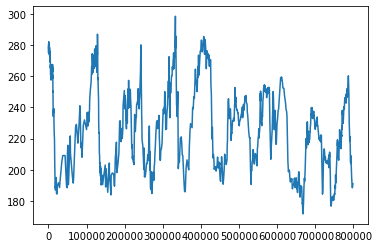

In [32]:
# Раскомментируйте следующую строку и впишите нужные "x" и "y" в аргументы функции
plt.plot(age, co2) 

Однако, здесь не будет подписией и картинка будет маленькой. Давайте сделаем хорошо:

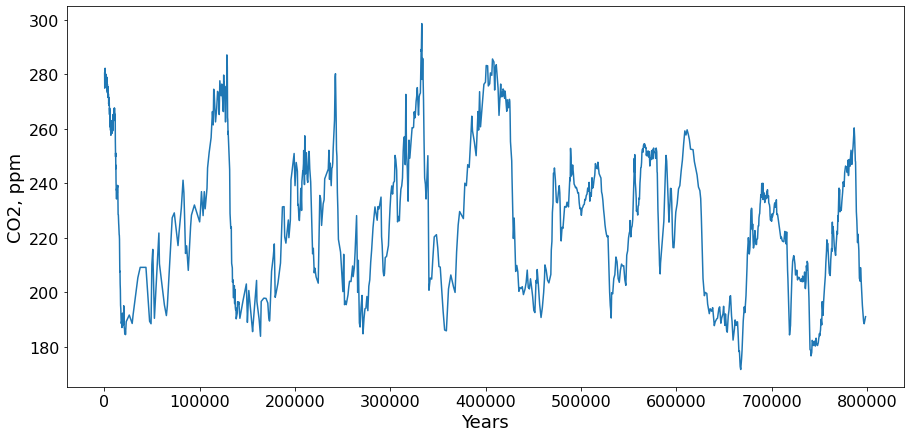

In [33]:
plt.figure(figsize=(15,7), facecolor='white') # figsize  регулирует размер картинки, а facecolor - цвет фона

plt.plot(age, co2) # впишите нужные "x" и "y" в аргументы функции

plt.xlabel('Years', fontsize=18)   # впишите правильную подпись оси x согласно содержанию текстового файла 
                                  # и выберите подходящий размер шрифта fontsize
plt.ylabel('CO2, ppm', fontsize=18)   # впишите правильную подпись оси y согласно содержанию текстового файла 
                                  # и выберите подходящий размер шрифта fontsize
    
plt.gca().tick_params(labelsize=16) # выберите хороший размер чисел по осям

Теперь вы умеете (или вспомнили), как считывать данные и строить графики. В следующих заданиях используйте ваши наработки!

## Часть вторая: Температурные реконструкции по Гренландии и события Dansgaard Oeschger (DO)

Скачайте данные по изотопному составу Гренландского керна **GRIP ($\delta^{18}$О) за 248 тысяч лет** (файл `gripd18o.txt`). Их можно найти на том же сайте, выбрав `ice cores` и найдя нужную строчку.
- Постройте график возраст/$\delta^{18}$О за период 10000 лет – 50000 лет

In [34]:
# Загрузите данные в переменные с помощью функции np.loadtxt
data = np.loadtxt('data/hard/gripd18o.txt')
age2 = data[:, 0]
d = data[:, 1]

(-43.0, -33.0)

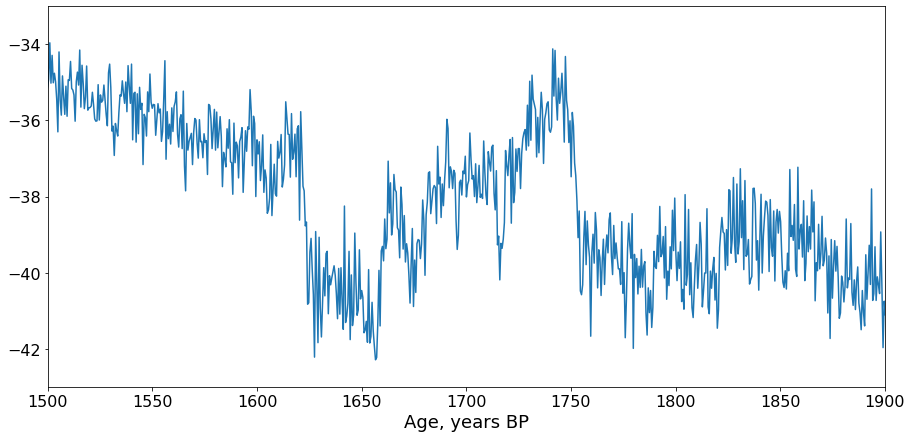

In [35]:
# Постройте график age vs. d18O. Раскомментируйте или добавьте нужные строки с правильными аргументами функций.

plt.figure(figsize=(15,7))
plt.xlabel('Age, years BP', fontsize=18)
plt.ylabel('', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.plot(age2, d)

# Чтобы выбрать нужный период, используйте функцию xlim :
plt.xlim([1500, 1900])

# Можно выбрать промежуток и по оси y: 
plt.ylim([-43, -33])

- Рассчитайте температуру по данным об изотопном составе T = $\frac{13.7 + \delta^{18}О}{0.67}$.

В `python`, а конкретнее в `numpy` есть векторное представление данных. Можно смело складывать и вычитытать скалярные величины (числа) и векторы (массивы данных) и это будет работать:

In [36]:
T = (13.7 + d)/0.67

Напомним, что во время события Dansgaard Oeschger (DO) температура в Арктике сначала быстро повышается, а затем медленно понижается.
- Постройте график зависимости температуры от возроста.
- Найдите пример любого DO события и увеличьте его на графике. Чтобы увеличивать данные на графике, можно использовать ограничения по оси x или/и по оси y, то есть функции `xlim` и `ylim`.

(-44.0, -30.0)

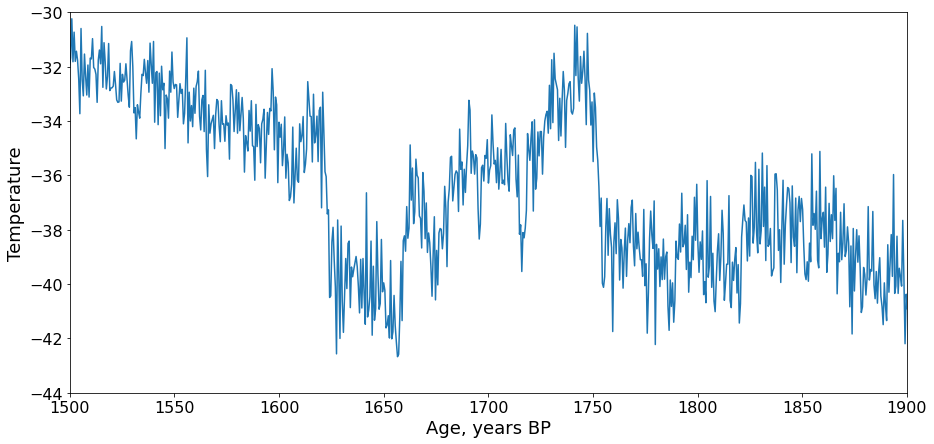

In [37]:
# Постройте график age VS temperature

plt.figure(figsize=(15,7))
plt.xlabel('Age, years BP', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.plot(age2, T)

# Чтобы выбрать нужный период, используйте функцию xlim :
plt.xlim([1500, 1900])

# Можно выбрать промежуток и по оси y: 
plt.ylim([-44, -30])

- На сколько градусов повысилась температура и за какой срок?
- Сколько времени потребовалось чтобы снова похолодало до уровня ледникового периода?

## Часть третья: История оледенений. Температура и CO2.

Скачайте данные по изотопному составу и температуре керна EPICA за 800 тысяч лет (`edc3deuttemp2007.txt`).
- Какие единицы измерения различных параметров?
- Определите связь температуры и изотопного состава.
- Какое разрешение данных?


In [38]:
# Загрузите данные в переменные с помощью функции np.loadtxt
bag, depth, age3, dD, temp = np.loadtxt('data/easy/edc3deuttemp2007.txt', unpack=True)

Постройте графики изменчивости температуры за весь период.
- Сколько крупных переходов от ледниковья к межледниковью вы выделяете?
- Определите перепад температуры межледниковий и ледниковий.

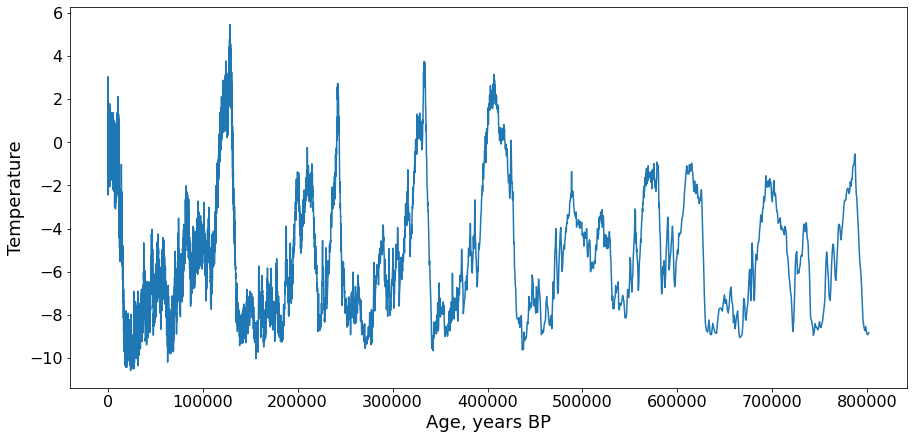

In [39]:
# Постройте график age vs. temperature
plt.figure(figsize=(15,7))
plt.xlabel('Age, years BP', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.plot(age3, temp)
plt.show()

На одном графике отобразите изменчивость температуры и CO$_2$ из первой части (файл `edc-co2-2008.txt`).

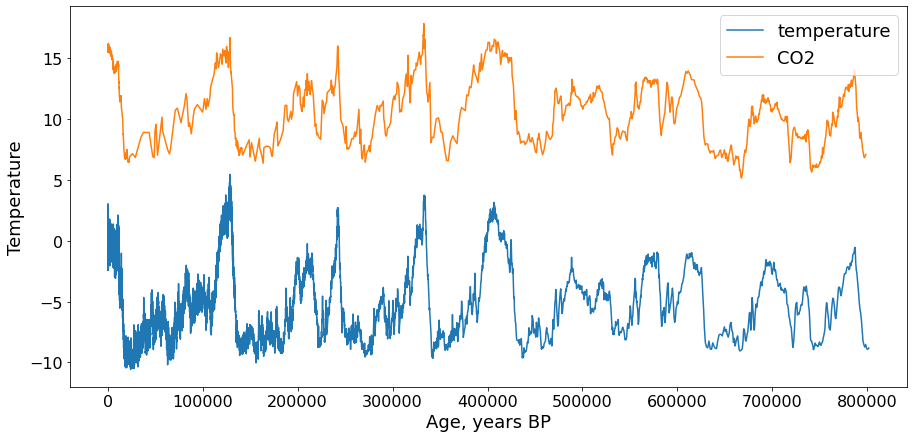

In [45]:
# Постройте график age vs. temperature и age vs. CO2

plt.figure(figsize=(15,7))
plt.xlabel('Age, years BP', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.plot(age3, temp, label='temperature')
plt.plot(age, co2/10 - 12, label='CO2')

plt.legend(fontsize=18)      # используйте эту функцию, чтобы отобразить легенду с названиями кривых 
plt.show()

## Часть четвертая: Горные керны

В файле `Elbrus_raw_data.txt` представлены данные содержания основных ионов в ледяном керне полученном летом 2009 г. 

In [46]:
# Загрузите данные в переменные с помощью функции np.loadtxt
depth, depth_bottom, depth_top_mwe, depth_bottom_mwe, NH4, Ca, NO3, \
SO4 = np.loadtxt('data/hard/Elbrus_raw_data.txt', unpack=True)

Постройте графики глубины и концентрации аммония (NH$_4$$^+$).
- Определите в каком году сформировался горизонт на глубине 35.8-35.9 м.
- Чем отличаются глубины? (mwe – meters water equivalent).
- До какой глубины сезонный сигнал легко читается?

(0.0, 36.0)

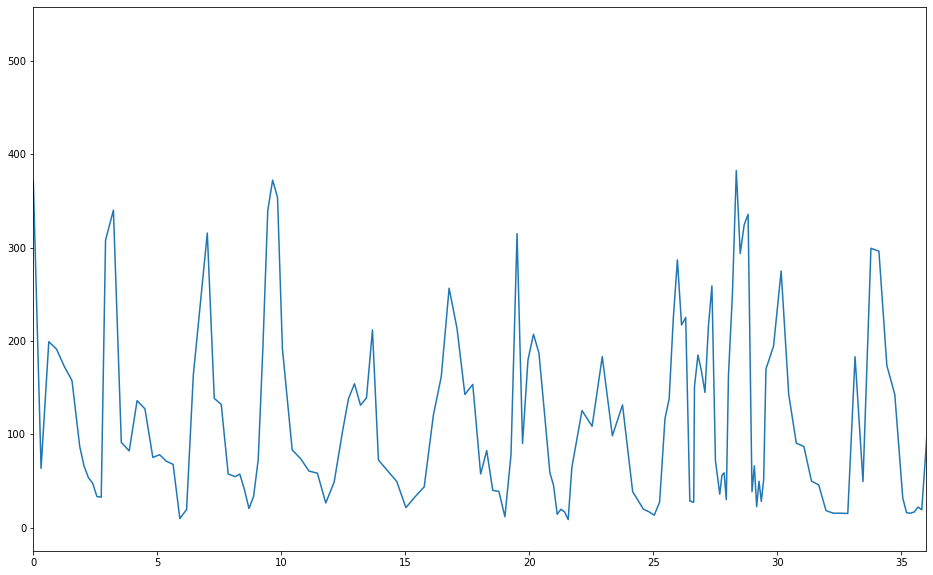

In [47]:
# Постройте график глубины аммония
plt.figure(figsize=(16,10))
# plt.plot(depth_bottom_mwe, NH4)
plt.plot(depth, NH4)
plt.xlim([0,36])

In [48]:
# Постройте график концентрации аммония
year, NH4, NO2, SO4 = np.loadtxt('data/hard/Elbrus_annual_summer.txt', unpack=True)

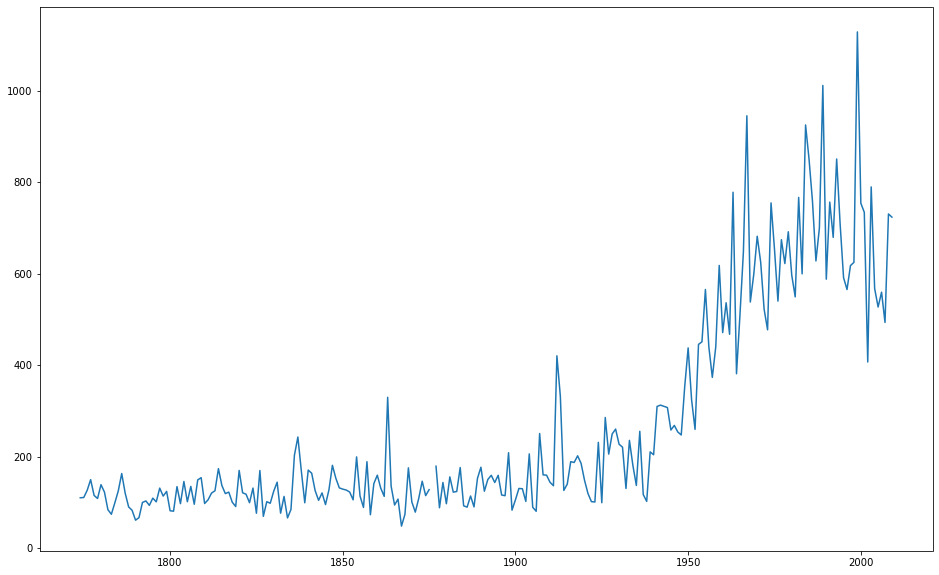

In [49]:
plt.figure(figsize=(16,10))
plt.plot(year, SO4)

Откройте файл среднего за летний сезон содержания основных ионов (аммоний, нитраты, сульфаты) `Elbrus_annual_summer.txt`
- Для каждого соединения определите во сколько раз концентрация увеличилась в последние 20 лет по сравнению с доиндустриальным временем.
- В какой период времени начался активный рост концентрации?
- Предположите возможные причины